In [1]:
import pandas as pd
import numpy as np
import opsvis as opsv
import openseespy.opensees as ops
import csv
import pathlib
from elastic_analysis import ElasticAnalysis

class Building_object:
    """
    Create a building object.
    """
    def __init__(self, geometry, member_size, gravity_loads):
        self.geometry = geometry
        self.member_size = member_size
        self.gravity_loads = gravity_loads

def read_tworow_csv_file(file_path):
    with open(file_path, 'r') as file:
        reader = csv.DictReader(file)
        data_dict = next(reader)  # 读取第一行的数据并转换为字典
    return data_dict

cwdFile = pathlib.Path.cwd()
buildingDataFile = cwdFile / 'BuildingData'
geometryFile = buildingDataFile / 'Geometry.csv'
memberSizeFile = buildingDataFile / 'MemberSize.csv'
loadsFile = buildingDataFile / 'Loads.csv'

geometry = read_tworow_csv_file(geometryFile)
member_size = pd.read_csv(memberSizeFile)
gravity_loads = pd.read_csv(loadsFile)
building = Building_object(geometry, member_size, gravity_loads)
ElasticAnalysis(building)

Variables are defined!
Nodes at frame corner and leaning column are defined!
Extra nodes for leaning column springs are defined!
All column base fixities have been defined!
Floor constraints are defined!
Beams are defined!
Columns are defined!
Nodal mass are defined!
6.282257092309499 33.3645156718132
1.0001477518121988 0.18831939204463582


In [2]:
beamSizeFile = buildingDataFile / 'beamsectionsize.csv'
SectionDatabaseFile = cwdFile / 'AllSectionDatabase.csv'
SectionDatabase = pd.read_csv(SectionDatabaseFile)
from beam_component import Beam
from steel_material import SteelMaterial
steel = SteelMaterial(yield_stress=50, ultimate_stress=65, elastic_modulus=29000, 
                      Ry_value=1.1)  # Unit: ksi
# 创建包含梁信息的嵌套字典
beam_section_size = pd.read_csv(beamSizeFile)
beams = {}
length = int(building.geometry['X bay width'])
for _, row in beam_section_size.iterrows():
    level, bay = map(int, row[:2])
    bsection_size = {'size': row[2]}
    beams.setdefault(level, {})
    beams[level].setdefault(bay, {})
    beams[level][bay] = Beam(bsection_size['size'], length, steel,SectionDatabase)

In [5]:
columnSizeFile = buildingDataFile / 'columnsectionsize.csv'
SectionDatabaseFile = cwdFile / 'AllSectionDatabase.csv'
SectionDatabase = pd.read_csv(SectionDatabaseFile)
from column_component import Column
from steel_material import SteelMaterial
steel = SteelMaterial(yield_stress=50, ultimate_stress=65, elastic_modulus=29000, 
                      Ry_value=1.1)  # Unit: ksi

# 构建包含柱信息的嵌套字典
column_section_size = pd.read_csv(os.path.join(basefile_path, 'columnsectionsize.csv'))
columns = {}
for _, row in column_section_size.iterrows():
    story, pier = map(int, row[:2])
    csection_size = {'size': row[2]}
    columns.setdefault(story, {})
    columns[story].setdefault(bay, {})
    axial_demand = abs(elastic_demand.dominate_load['column axial'][story, 2 * pier])
    Lx = (building.geometry['floor height'][story+1] - building.geometry['floor height'][story]).item()
    Ly = Lx
    columns[story][pier] = Column(csection_size['size'], axial_demand, Lx, Ly, steel)

1580500.0

<Axes: >

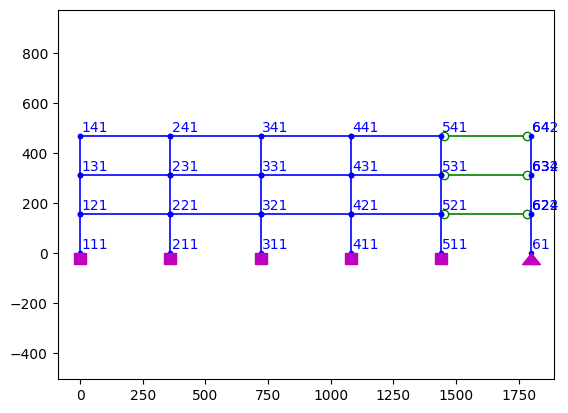

In [16]:
opsv.plot_model(node_labels=1, element_labels=0, offset_nd_label=False, axis_off=0, az_el=(-60.0, 30.0), fig_wi_he=False, fig_lbrt=False, local_axes=True, nodes_only=False, fmt_model={'color': 'blue', 'linestyle': 'solid', 'linewidth': 1.2, 'marker': '.', 'markersize': 6}, fmt_model_nodes_only={'color': 'blue', 'linestyle': 'solid', 'linewidth': 1.2, 'marker': '.', 'markersize': 6}, node_supports=True, gauss_points=True, fmt_gauss_points={'color': 'firebrick', 'linestyle': 'None', 'linewidth': 2.0, 'marker': 'X', 'markersize': 5}, fmt_model_truss={'color': 'green', 'linestyle': 'solid', 'linewidth': 1.2, 'marker': 'o', 'markerfacecolor': 'white', 'markersize': 6}, truss_node_offset=0.96, ax=False)

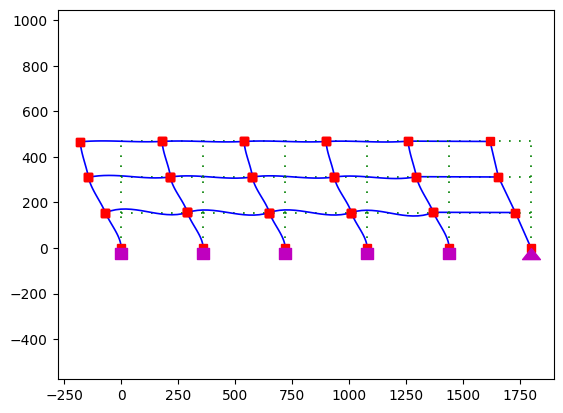

In [14]:
opsv.plot_mode_shape(1, sfac=False, nep=17, unDefoFlag=1, 
                       fmt_defo={'color': 'blue', 'linestyle': 'solid', 'linewidth': 1.2, 'marker': '', 'markersize': 1}, 
                       fmt_undefo={'color': 'green', 'linestyle': (0, (1, 5)), 'linewidth': 1.2, 'marker': '', 'markersize': 1}, 
                       fmt_defo_faces={'alpha': 0.5, 'edgecolors': 'k', 'linewidths': 1}, fmt_undefo_faces={'alpha': 0.5, 'edgecolors': 'g', 'facecolors': 'w', 'linestyles': 'dotted', 'linewidths': 1}, 
                       interpFlag=1, endDispFlag=1, fmt_nodes={'color': 'red', 'linestyle': 'None', 'linewidth': 1.2, 'marker': 's', 'markersize': 6}, Eo=0, az_el=(-60.0, 30.0), fig_wi_he=False, 
                       fig_lbrt=False, node_supports=True, ax=False)

In [3]:
ops.wipe()
ops.model('basic', '-ndm', 2, '-ndf', 3)
createnodes(13)
ops.getNodeTags()

[13, 14]

In [1]:
import numpy as np
from createnodes import *
a = np.zeros([2, 2, 2])
a[0, 0, :] = [1, 2]
b = a[0, 0, :]
c = test(b)
c

1.0


array([1., 2.])

In [13]:
b = 10
a = '%i%s' % (b,'01')
a = int(a)
a

1001

In [4]:
import numpy as np
a = np.zeros([9])
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
import pandas as pd
df = pd.read_csv(r'C:\Users\12734\OneDrive\重要文件\可参考文件\AutoSDAPlatform-master\AutoSDAPlatform-master\AllSectionDatabase.csv')
df

,index,section size,weight,A,d,bf,tw,tf,bf to tf ratio,h to tw ratio,...,Zx,Sx,rx,Iy,Zy,Sy,ry,J,Cw,rts
0,0,W36X652,652,192.00,41.1,17.60,1.970,3.540,2.48,16.3,...,2910.0,2460.0,16.20,3230.00,581.00,367.00,4.100,593.000,1130000,4.96
1,1,W36X529,529,156.00,39.8,17.20,1.610,2.910,2.96,19.9,...,2330.0,1990.0,16.00,2490.00,454.00,289.00,4.000,327.000,846000,4.80
2,2,W36X487,487,143.00,39.3,17.10,1.500,2.680,3.19,21.4,...,2130.0,1830.0,15.80,2250.00,412.00,263.00,3.960,258.000,754000,4.74
3,3,W36X441,441,130.00,38.9,17.00,1.360,2.440,3.48,23.6,...,1910.0,1650.0,15.70,1990.00,368.00,235.00,3.920,194.000,661000,4.69
4,4,W36X395,395,116.00,38.4,16.80,1.220,2.200,3.83,26.3,...,1710.0,1490.0,15.70,1750.00,325.00,208.00,3.880,142.000,575000,4.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,165,W12X45,45,13.10,12.1,8.05,0.335,0.575,7.00,29.6,...,64.2,57.7,5.15,50.00,19.00,12.40,1.950,1.260,1650,2.23
166,166,W12X35,35,10.30,12.5,6.56,0.300,0.520,6.31,36.2,...,51.2,45.6,5.25,24.50,11.50,7.47,1.540,0.741,879,1.79
167,167,W14X26,26,7.69,13.9,5.03,0.255,0.420,5.98,48.1,...,40.2,35.3,5.65,8.91,5.54,3.55,1.080,0.358,405,1.30
168,168,W12X22,22,6.48,12.3,4.03,0.260,0.425,4.74,41.8,...,29.3,25.4,4.91,4.66,3.66,2.31,0.848,0.293,164,1.04


In [8]:
from Functions import SectionProperty
section_info = SectionProperty('W14X500', df)
section_info

{'index': 55,
 'section size': 'W14X500',
 'weight': 500,
 'A': 147.0,
 'd': 19.6,
 'bf': 17.0,
 'tw': 2.19,
 'tf': 3.5,
 'bf to tf ratio': 2.43,
 'h to tw ratio': 5.21,
 'Ix': 8210,
 'Zx': 1050.0,
 'Sx': 838.0,
 'rx': 7.48,
 'Iy': 2880.0,
 'Zy': 522.0,
 'Sy': 339.0,
 'ry': 4.43,
 'J': 514.0,
 'Cw': 187000,
 'rts': 5.26}

In [9]:
section_info['A']

147.0

1001